NBA Team Performance Data:
      Rk                 Team   G     MP    FG   FGA    FG%    3P   3PA  \
0      1    San Antonio Spurs  82  240.9  47.0  94.4  0.498   0.6   2.5   
1      2   Los Angeles Lakers  82  242.4  47.5  89.9  0.529   0.2   1.2   
2      3  Cleveland Cavaliers  82  243.0  46.5  98.1  0.474   0.4   2.3   
3      4      New York Knicks  82  241.2  46.4  93.6  0.496   0.5   2.3   
4      5       Boston Celtics  82  242.4  44.1  90.1  0.490   2.0   5.1   
...   ..                  ...  ..    ...   ...   ...    ...   ...   ...   
1099  26           Miami Heat  82  240.6  39.6  88.0  0.450  11.3  32.4   
1100  27        Chicago Bulls  82  242.7  39.8  87.9  0.453   9.1  25.9   
1101  28      New York Knicks  82  241.2  38.2  88.3  0.433  10.0  29.5   
1102  29  Cleveland Cavaliers  82  240.9  38.9  87.6  0.444  10.3  29.1   
1103  30    Memphis Grizzlies  82  242.4  38.0  84.4  0.450   9.9  28.9   

        3P%  ...   DRB   TRB   AST   STL  BLK   TOV    PF    PTS  Year  

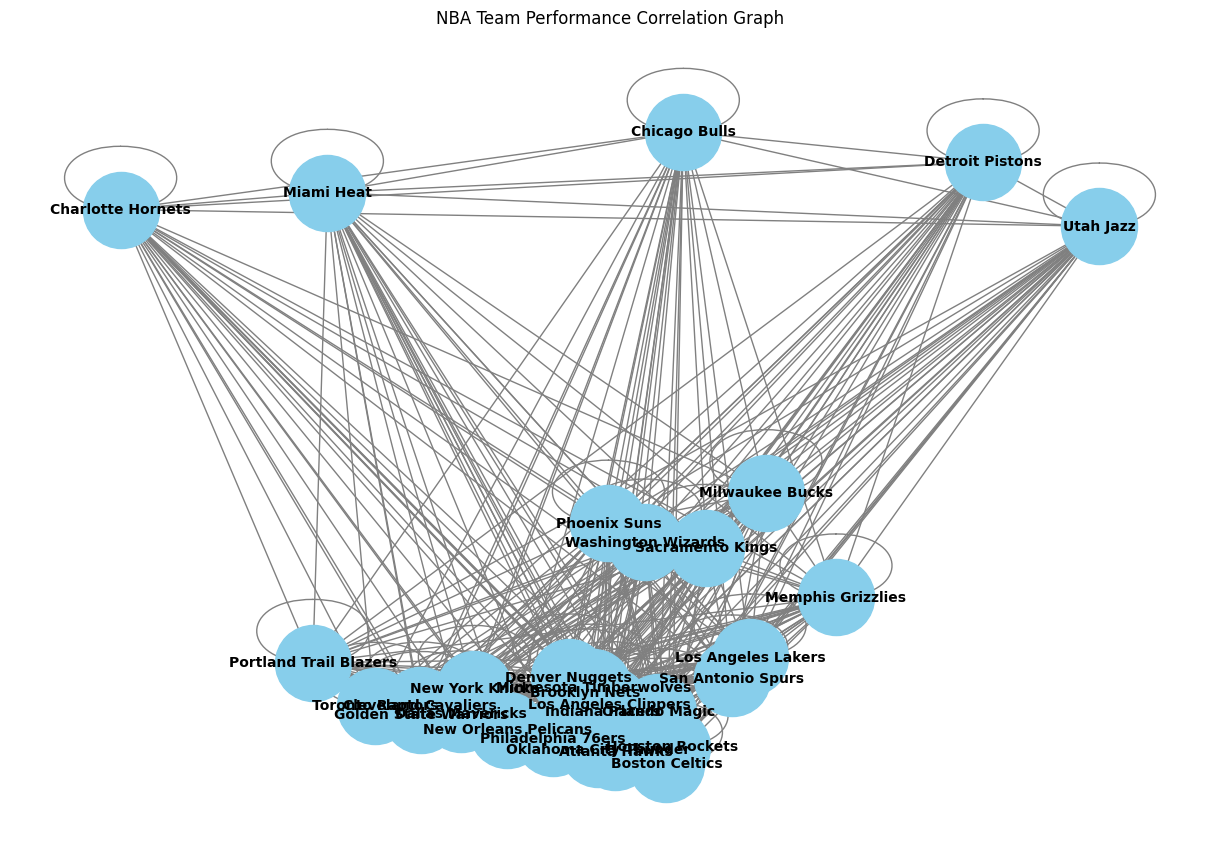

In [16]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load the data from the CSV file
df = pd.read_csv('C:/Users/jkann/Downloads/archive/renamed_teams.csv')

# Display the DataFrame
print("NBA Team Performance Data:")
print(df)

# Remove non-numeric columns for correlation calculation
df_numeric = df.select_dtypes(include=['number'])

# Calculate correlations between performance metrics
correlation_matrix = df_numeric.corr()

# Display the correlation matrix
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Create a graph based on the correlation matrix
G = nx.Graph()

# Add nodes (teams) to the graph
teams = df['Team'].tolist()
G.add_nodes_from(teams)

# Add edges based on significant correlations (e.g., correlation > 0.5)
threshold = 0.5
for i, team1 in enumerate(teams):
    for j, team2 in enumerate(teams):
        if i != j:
            correlation = correlation_matrix.iloc[i % len(correlation_matrix), j % len(correlation_matrix)]
            if abs(correlation) > threshold:
                G.add_edge(team1, team2, weight=correlation)

# Calculate centrality metrics
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G)

# Identify important nodes (teams)
important_nodes_degree = sorted(degree_centrality, key=degree_centrality.get, reverse=True)[:3]
important_nodes_betweenness = sorted(betweenness_centrality, key=betweenness_centrality.get, reverse=True)[:3]
important_nodes_eigenvector = sorted(eigenvector_centrality, key=eigenvector_centrality.get, reverse=True)[:3]

# Display important nodes
print("\nImportant Nodes (Teams) based on Degree Centrality:")
for node in important_nodes_degree:
    print(f"Team: {node}, Degree Centrality: {degree_centrality[node]}")

print("\nImportant Nodes (Teams) based on Betweenness Centrality:")
for node in important_nodes_betweenness:
    print(f"Team: {node}, Betweenness Centrality: {betweenness_centrality[node]}")

print("\nImportant Nodes (Teams) based on Eigenvector Centrality:")
for node in important_nodes_eigenvector:
    print(f"Team: {node}, Eigenvector Centrality: {eigenvector_centrality[node]}")

# Draw the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=10, font_weight='bold', edge_color='gray')
plt.title("NBA Team Performance Correlation Graph")
plt.show()
  